讀入套件

In [8]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import sklearn.model_selection as skm
from ISLP import load_data  #, confusion_table
from ISLP.models import ModelSpec as MS

In [9]:
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR)
from ISLP.bart import BART

讀入 Boston 資料，將資料分成 training set, test test

In [10]:
Boston = load_data("Boston")
model = MS(Boston.columns.drop('medv'), intercept=False)
D = model.fit_transform(Boston)
feature_names = list(D.columns)
X = np.asarray(D)

In [11]:
(X_train,
 X_test,
 y_train,
 y_test) = skm.train_test_split(X,
                                Boston['medv'],
                                test_size=0.3,
                                random_state=0)

使用 boosting 建立模型

In [12]:
boost_boston = GBR(n_estimators=5000,   #設定模型參數, iteration 次數
                   learning_rate=0.001, #learning rate
                   max_depth=3, #限制每個 iteration 的樹大小
                   random_state=0)
boost_boston.fit(X_train, y_train)    #計算模型

GradientBoostingRegressor(learning_rate=0.001, n_estimators=5000,
                          random_state=0)

In [16]:
#?GBR

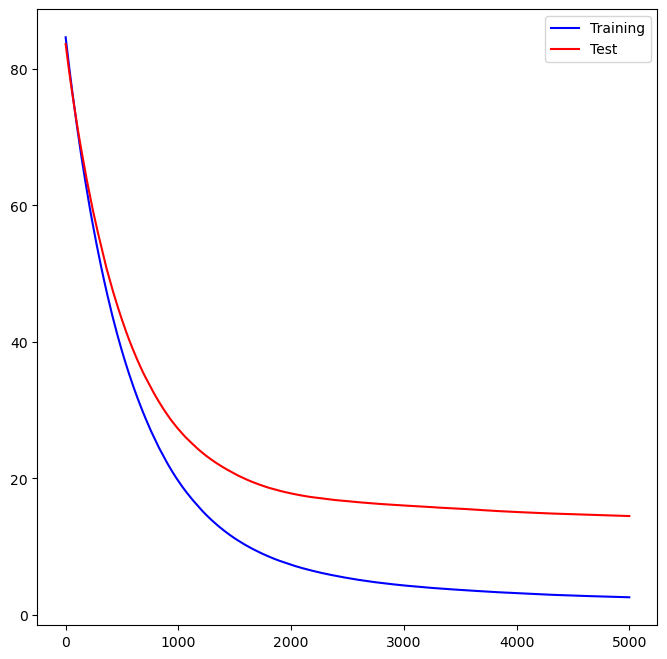

In [17]:
test_error = np.zeros_like(boost_boston.train_score_)
for idx, y_ in enumerate(boost_boston.staged_predict(X_test)): #給出到每個 stage (iteration) 為止的估計值
   test_error[idx] = np.mean((y_test - y_)**2) #計算每層 iteration 完模型的 MSE

plot_idx = np.arange(boost_boston.train_score_.shape[0]) #從 1:5000
ax = subplots(figsize=(8,8))[1]
ax.plot(plot_idx,
        boost_boston.train_score_,
        'b',
        label='Training')
ax.plot(plot_idx,
        test_error,
        'r',
        label='Test')
ax.legend();

In [18]:
y_hat_boost = boost_boston.predict(X_test);
np.mean((y_test - y_hat_boost)**2)

14.481405918831591

改變 learning rate (從 0.001 改為 0.2)

In [19]:
boost_boston = GBR(n_estimators=5000,
                   learning_rate=0.2,
                   max_depth=3,
                   random_state=0)
boost_boston.fit(X_train,
                 y_train)
y_hat_boost = boost_boston.predict(X_test);
np.mean((y_test - y_hat_boost)**2)

14.501514553719565